# Birth Rate Across the Globe

<a id = "top"></a>
## Contents

[1. Milestone 1](#1)
- [1.1 Introduction](#1.1)
- [1.1 Data Information](#1.2)
- [1.3 Data Dictionary](#1.3)
- [1.4 Visualizations](#1.4)
    - [Birth Rate](#1.4a)
    - [Scatter Plots of Birth Rate and Various Features](#1.4b)
    - [Correlation Heatmap](#1.4c)
    - [Box Plots of Numerical Features](#1.4d)
- [1.5 Insights from Visualizations](#1.5)
    
[2. Milestone 2](#2)
- [2.1 Exploring the Data](#2.1)
- [2.2 Dropping Columns](#2.2)
- [2.3 Column Headers](#2.3)
- [2.4 Converting Data Types](#2.4)
- [2.5 Missing Values](#2.5)
- [2.6 Feature Selection](#2.6)
- [2.7 Outliers](#2.7)
- [2.8 Target Variable Normalization](#2.8)
- [2.9 Dropping Additional Columns](#2.10)
- [2.10 Milestone 2 Summary](#2.9)

[3. Milestone 3](#3)
- [3.1 Split the Data - Linear Regression & Random Forest](#3.1)
- [3.2 Model Selection - Linear Regression & Random Forest](#3.2)
- [3.3 Model Evaluation - Linear Regression & Random Forest](#3.3)
- [3.4 Split the Data - Support Vector Regression](#3.4)
- [3.5 Model Selection - Support Vector Regression](#3.5)
- [3.6 Model Evaluation - Support Vector Regression](#3.6)
- [3.7 Milestone 3 Summary](#3.7)

[4. Addendum](#4.0)
- [4.1 Linear Regression & Random Forest](#4.1)
- [4.2 Support Vector Regression](#4.2)
- [4.3 Summary](#4.3)

## Milestone 1 <a id = "1"></a>

### Introduction <a id = "1.1"></a>

The data used for this project comes from Kaggle. It was compiled by the user from multiple sources and does not contain date series information. There is not a more detailed description of where the author gathered the data. Because of this, this model should not be presented in a professional setting. The data itself contains information across a variety of features related to economics, population, and geographical information. It is organized by country. 

With all the different types of information given in the dataset it could have many uses. For this project, the birth rate will be the target and predictors will be selected based on this feature. The birth rate is measured as being the number of births per 1,000 population per year. I am particulary interested in how the unemployment rate, education rates and out of pocket healthcare expenditure rates are related to birth rate. It is my hypothesis that higher education and healthcare expenditure rates will correlate with a lower birth rate, while a lower unemployment rate will correlate with a higher birth rate. The birth rate is already standardized given that it is per 1,000 population but I will also look at population totals to determine if there are any trends.

This information could be used by healthcare providers, retailers targeting maternity and baby-related goods, and pharmaceutical companies. With the ability to predict the birth rate, they could target their marketing campaigns towards a particular country or culture. It could also help them make decisions regarding which region or country is prime for expansion. Governments could also use the information to get a pulse for the health of their countries and areas of improvement. 

A crucial part to this project will be feature selection. There are many features contained in the dataset that span a variety of different measurements. Selecting those features that best predict birth rate will be crucial and may be surprising. The first visualizations will help identify relationships between the variables and the strength of those relationships.


### Data Information <a id = "1.2"></a>

The data was sourced from https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023. 

### Data Dictionary <a id = "1.3"></a>

| Field Name                               | Description                                                                         |
|-------------------------------------------|-------------------------------------------------------------------------------------|
| Country                                   | Name of the country.                                                                |
| Density (P/Km2)                          | Population density measured in persons per square kilometer.                         |
| Abbreviation                             | Abbreviation or code representing the country.                                       |
| Agricultural Land (%)                    | Percentage of land area used for agricultural purposes.                              |
| Land Area (Km2)                          | Total land area of the country in square kilometers.                                 |
| Armed Forces Size                        | Size of the armed forces in the country.                                             |
| Birth Rate                                | Number of births per 1,000 population per year.                                     |
| Calling Code                              | International calling code for the country.                                         |
| Capital/Major City                        | Name of the capital or major city.                                                  |
| CO2 Emissions                            | Carbon dioxide emissions in tons.                                                   |
| CPI                                       | Consumer Price Index, a measure of inflation and purchasing power.                    |
| CPI Change (%)                            | Percentage change in the Consumer Price Index compared to the previous year.        |
| Currency_Code                             | Currency code used in the country.                                                  |
| Fertility Rate                            | Average number of children born to a woman during her lifetime.                       |
| Forested Area (%)                         | Percentage of land area covered by forests.                                         |
| Gasoline_Price                            | Price of gasoline per liter in local currency.                                      |
| GDP                                       | Gross Domestic Product, the total value of goods and services produced in the country.|
| Gross Primary Education Enrollment (%)   | Gross enrollment ratio for primary education.                                       |
| Gross Tertiary Education Enrollment (%)  | Gross enrollment ratio for tertiary education.                                      |
| Infant Mortality                          | Number of deaths per 1,000 live births before reaching one year of age.              |
| Largest City                              | Name of the country's largest city.                                                 |
| Life Expectancy                           | Average number of years a newborn is expected to live.                               |
| Maternal Mortality Ratio                  | Number of maternal deaths per 100,000 live births.                                  |
| Minimum Wage                              | Minimum wage level in local currency.                                               |
| Official Language                         | Official language(s) spoken in the country.                                         |
| Out of Pocket Health Expenditure (%)      | Percentage of total health expenditure paid out-of-pocket by individuals.           |
| Physicians per Thousand                   | Number of physicians per thousand people.                                           |
| Population                                | Total population of the country.                                                    |
| Population Labor Force Participation (%)  | Percentage of the population that is part of the labor force.                       |
| Tax Revenue (%)                           | Tax revenue as a percentage of GDP.                                                 |
| Total Tax Rate                            | Overall tax burden as a percentage of commercial profits.                            |
| Unemployment Rate                         | Percentage of the labor force that is unemployed.                                   |
| Urban Population                          | Percentage of the population living in urban areas.                                 |
| Latitude                                  | Latitude coordinate of the country's location.                                      |
| Longitude                                 | Longitude coordinate of the country's location.                                     |

### Loading the Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.5.3
numpy version: 1.23.5


In [3]:
# Load the data into a dataframe
world_data_orig = pd.read_csv("world-data-2023.csv")
world_df = world_data_orig.copy()
display(world_df.head(5))

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


[Return to top](#top)

### Visualizations <a id = "1.4"></a>

#### Distribution of Birth Rate<a id = "1.4a"></a>

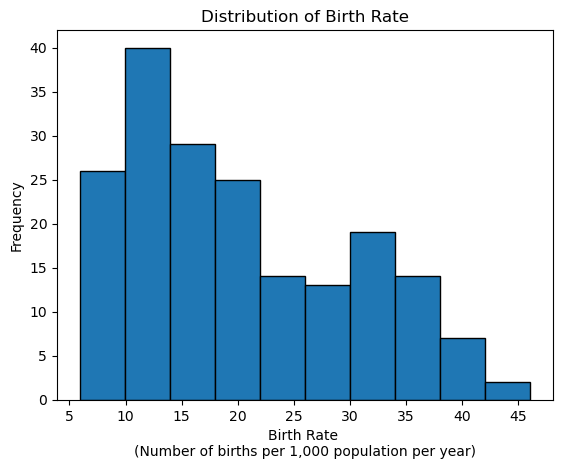

In [4]:
plt.hist(world_df["Birth Rate"], edgecolor = "black")

plt.title("Distribution of Birth Rate")
plt.xlabel("Birth Rate \n(Number of births per 1,000 population per year)")
plt.ylabel("Frequency")

plt.show()

##### Observations

The distribution is positively skewed as seen by the majority of the data points concentrated to the left. The majority of instances in the data fall between 6 - 18 births per 1,000 people. It does not appear that there are any obvious outliers. The skewness of the distribution means that the data will need to be transformed so a normal distribution is achieved. 

#### <a id = "1.4b"></a>

#### Scatter Plots of Birth Rate and Various Features<a id = "1.4b"></a>

In [5]:
# Removes the percentage signs and converts the columns to numeric
for column in world_df.columns:
    if world_df[column].dtype == "object" and "%" in world_df[column].iloc[0]:
        world_df[column] = pd.to_numeric(world_df[column].str.replace('%', ''))

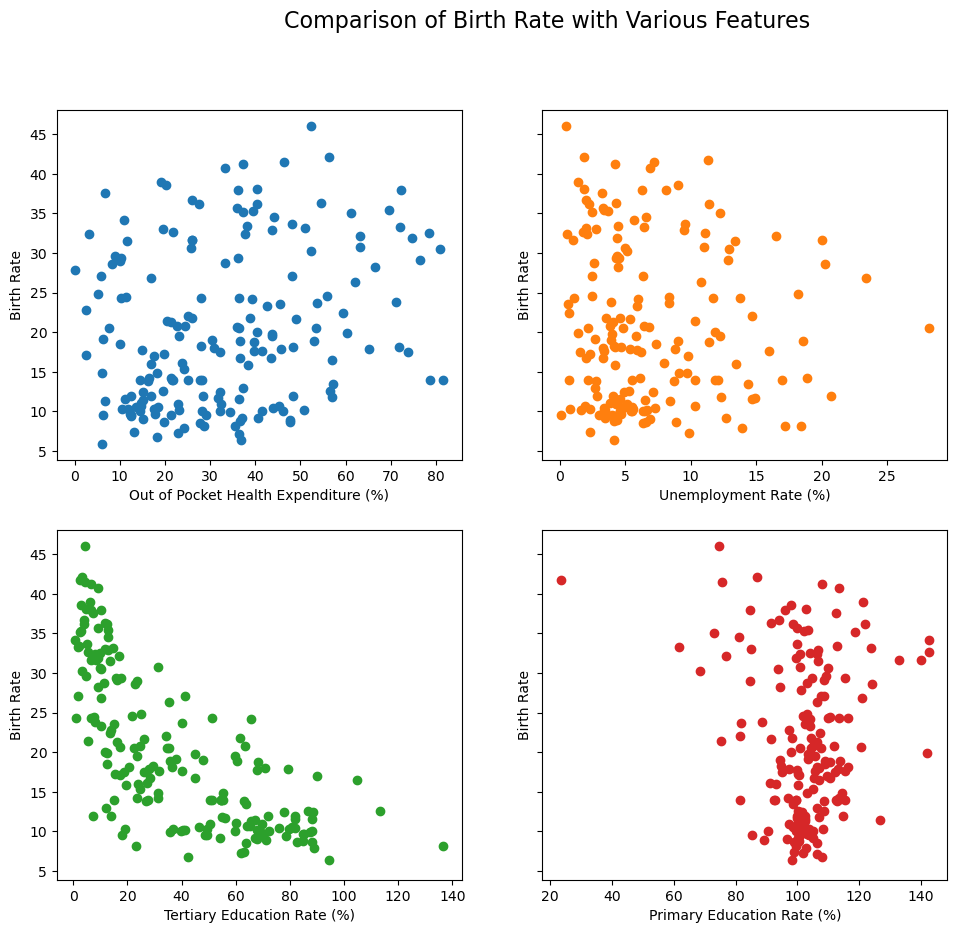

In [6]:
# Creates multiple subplots sharing an x-axis
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharey = True, figsize =(10,10))

# Creates each plot
axs[0, 0].scatter(world_df["Out of pocket health expenditure"], world_df["Birth Rate"])
axs[0, 0].set_xlabel("Out of Pocket Health Expenditure (%)")

axs[0, 1].scatter(world_df["Unemployment rate"], world_df["Birth Rate"], c = "tab:orange")
axs[0, 1].set_xlabel("Unemployment Rate (%)")

axs[1, 0].scatter(world_df["Gross tertiary education enrollment (%)"], world_df["Birth Rate"], c = "tab:green")
axs[1, 0].set_xlabel("Tertiary Education Rate (%)")

axs[1, 1].scatter(world_df["Gross primary education enrollment (%)"], world_df["Birth Rate"], c = "tab:red")
axs[1, 1].set_xlabel("Primary Education Rate (%)")

fig.suptitle("Comparison of Birth Rate with Various Features", fontsize=16)

# Sets the x-label for each of the x-axes
for ax in axs.flat:
    ax.set(ylabel="Birth Rate")

# Adjusts the distance of the y-label from the plot
plt.subplots_adjust(left = 0.01)

plt.show()

##### Observations

- There is not a clear correlation between the out of pocket health expenditure or unemployment rate with the birth rate. 

- There does appear to be a negative correlation between tertiary education and the birth rate. As tertiary education decreases, birth rate tends to increase.

- Primary education appears to be fairly constant around the 100% mark with outliers becoming more frequent as the birth rate increases. It is difficult to ascertain correlation by viewing this plot because the outliers are found both above and below the 100% mark.

#### Correlation Heatmap <a id = "1.4c"></a>

In [7]:
# Removes the dollar signs and commas and converts the columns to numeric
for column in world_df.columns:
    if world_df[column].dtype == "object" and ("$" in world_df[column].iloc[0] or "," in world_df[column].iloc[0]):
        world_df[column] = pd.to_numeric(world_df[column].str.replace("[\$,]", '', regex = True))

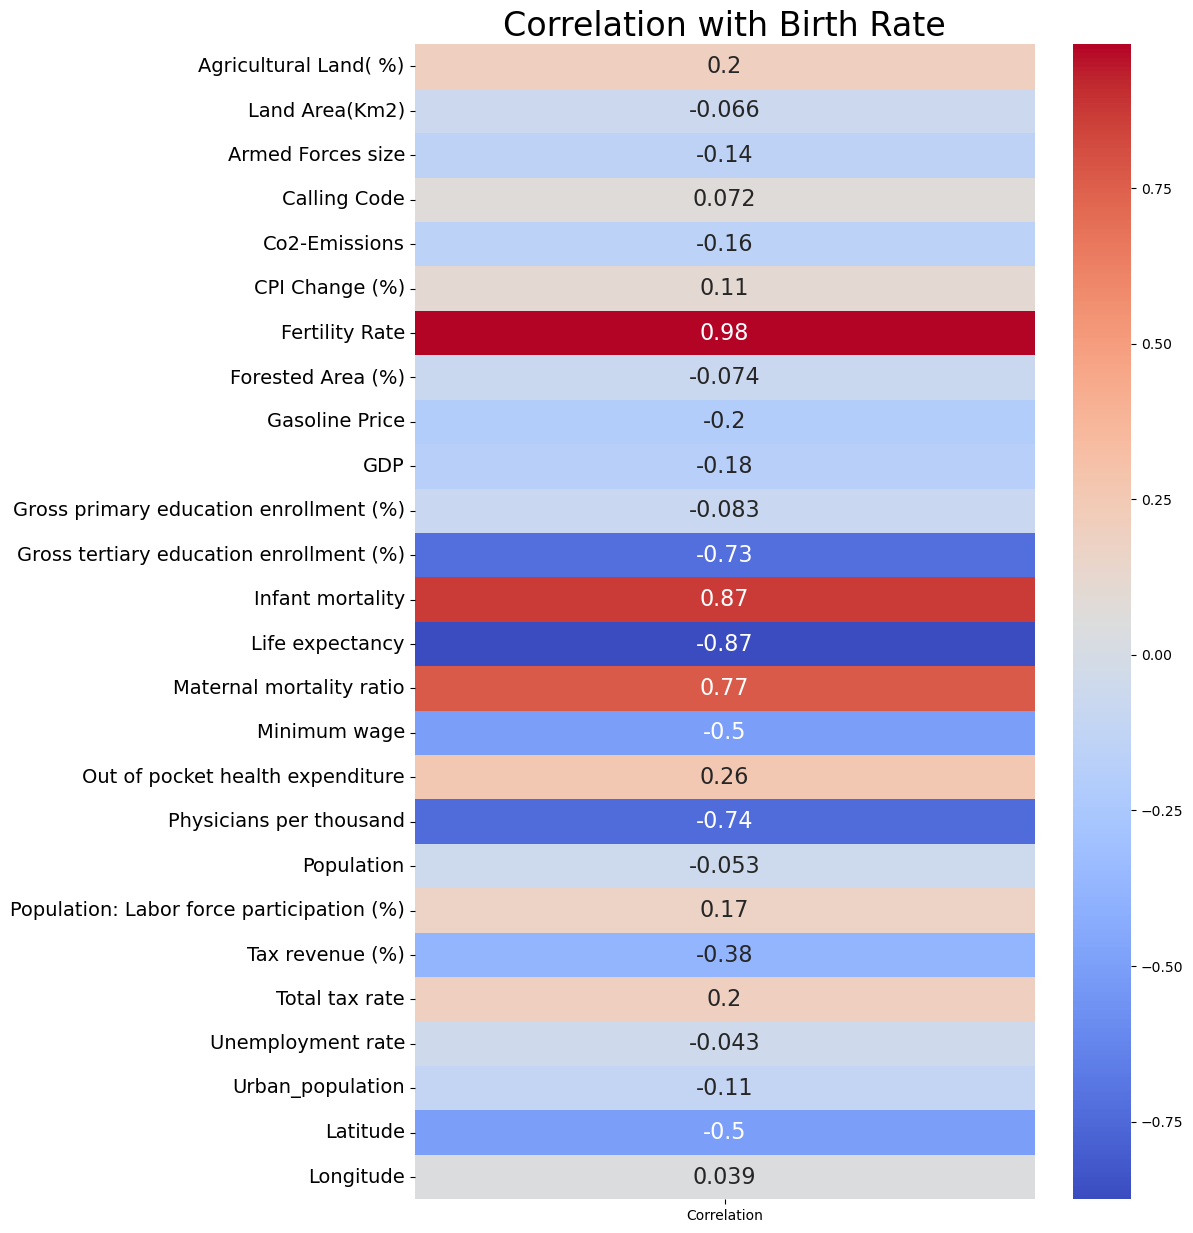

In [8]:
# Finds the correlation values
corr = world_df.select_dtypes("number").corr()

# Aggregates the correlation values associated with Birth Rate
birth_rate_corr = corr["Birth Rate"].drop("Birth Rate")

plt.figure(figsize = (10, 15))

# Creates the heatmap
heatmap = sns.heatmap(birth_rate_corr.to_frame("Correlation"), annot = True, annot_kws = {"size": 16}, cmap = "coolwarm")

# Sets the size of the y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontsize = 14)
plt.title("Correlation with Birth Rate", fontsize = 24)

plt.show()

##### Observations

- Fertility rate is highly positively correlated with birth rate but this makes sense because fertility rate is the average number of children born to a woman in her lifetime. It would stand to reason that where the birth rate is higher, the fertility rate would also be higher. This correlation suggests multicollinearity so fertility rate will likely have to be removed from the model. 

- Infant mortality and maternal mortality are similar cases to fertility rate. Infant mortality is measured as the number of deaths per 1,000 live births before reaching one year of age. Maternal mortality is the number of maternal deaths per 100,000 live births. It stands to reason that both of these numbers would be larger where the number of births per 1,000 people is also larger.

- Life expectancy, physicians per thousand, and gross tertiary education enrollment are strongly negatively correlated with birth rate. These might prove interesting features to explore in the model.

#### Box Plots of Numerical Features <a id = "1.4d"></a>

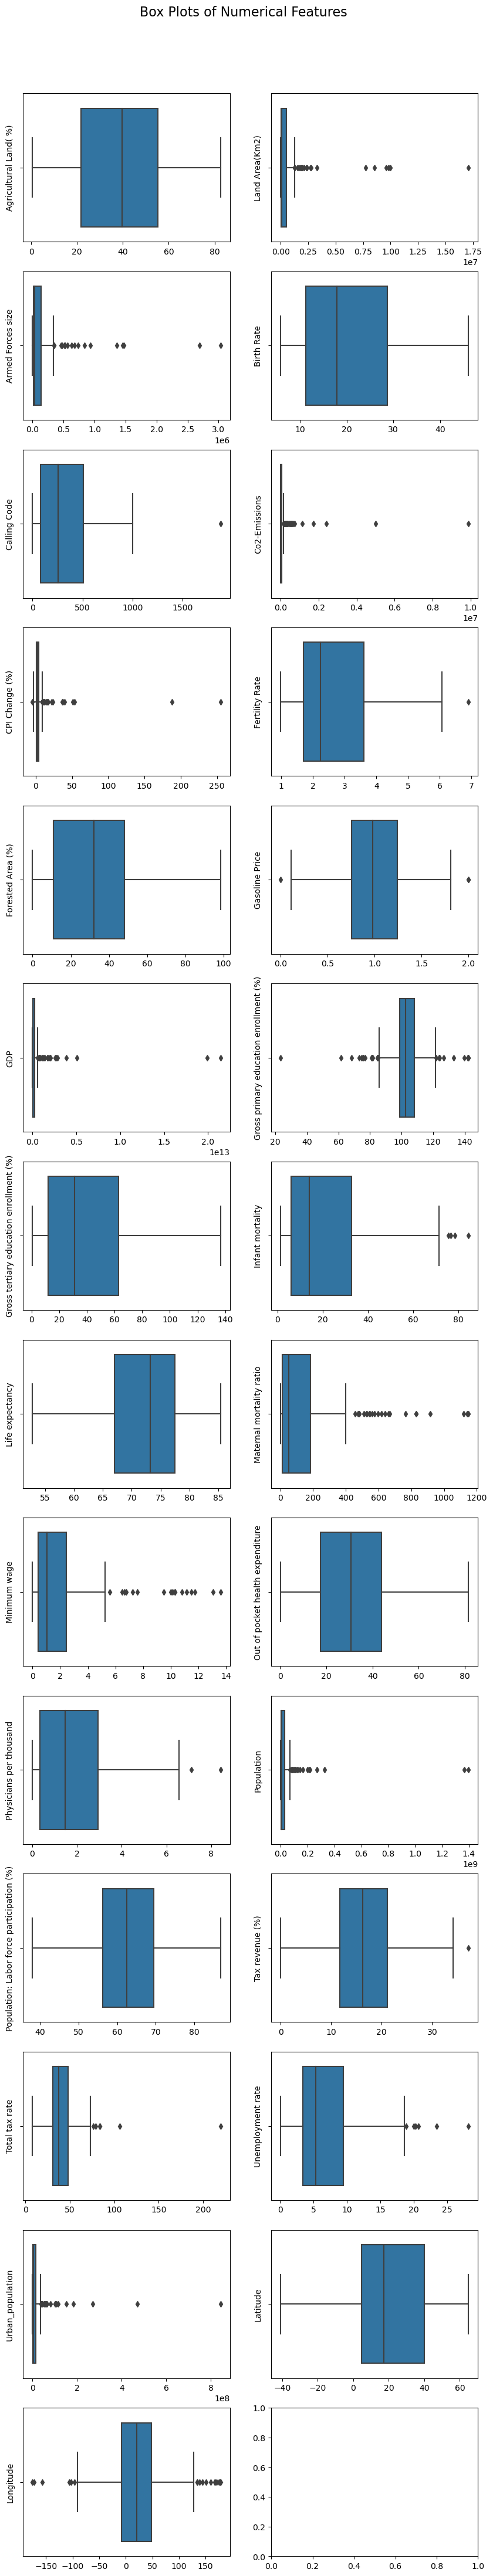

In [9]:
# Creates a list of all the numeric columns
numeric_columns = world_df.select_dtypes("number").columns

# Finds the length of the list
num_subplots = len(numeric_columns)

# Finds the number of rows needed to plot the list
num_rows = (num_subplots + 1) // 2

fig, axs = plt.subplots(nrows = num_rows, ncols = 2, figsize = (10, 50))


for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2
    
    sns.boxplot(x = world_df[column], ax = axs[row_index, col_index])
    axs[row_index, col_index].set_ylabel(column)
    axs[row_index, col_index].set(xlabel = "")

fig.suptitle("Box Plots of Numerical Features", fontsize=16)

plt.subplots_adjust(top=.95)

plt.show()

##### Observations

The box plots help show the distribution of each of the numerical features as well as the outliers. This is a quick way to identify outliers that might affect the model. Several features appear to have significant outliers that should be considered if used in the model.

_Contain Outliers_
- Land Area
- Armed Forces
- Co2 Emissions
- CPI Change
- Fertility Rate (1)
- Gasoline Price (2)
- GDP
- Gross Primary Education Enrollment
- Infant Mortality
- Maternal Mortality
- Minimum Wage
- Physicians per Thousand (2)
- Population
- Tax Revenue (1)
- Total Tax Rate
- Unemployment Rate
- Urban Population
- Longitude

### Insights from Visualizations <a id = "1.5"></a>

The visualizations revealed some telling insights that should be taken into account when building the model.

- The target variable is not normally distributed but is instead positively skewed.

- There is no significant correlation between a couple of the features selected in the hypothesis and the birth rate. They don't appear to be relevant to the prediction of birth rate.

- There were several features that do appear to be strongly correlated to birth rate that may prove helpful in predictions.

- There is a risk of multicollinearity between birth rate and a couple other features.

- There are significant outliers in some of the columns. These should be considered and handled appropriately if they are used in the model.

It appears there are relationships between multiple features and birth rate. There is a good chance that an appropriate model would be able to predict the birth rate using these features. The hypothesis will need to be adjusted to exclude out of pocket healthcare expenditure, primary education, and unemployment rate. 

[Return to top](#top)

## Milestone 2 <a id = "2"></a>

<a id = "2.1"></a>
### Exploring the Data

In [10]:
# Prints the shape of the dataframe
shape = world_df.shape
print(f"{shape[0]} rows, {shape[1]} columns")

195 rows, 35 columns


In [11]:
# Looks at the data types for all columns
column_data_types = world_df.dtypes.value_counts()
print("Number of columns with each data type:\n",column_data_types)

for dtype in column_data_types.index:
    columns_type = world_df.select_dtypes(include = [dtype]).columns.to_list()
    print(f"\nColumns with data type {dtype}:")
    for column in columns_type:
        print(column)

Number of columns with each data type:
 float64    27
object      8
dtype: int64

Columns with data type float64:
Agricultural Land( %)
Land Area(Km2)
Armed Forces size
Birth Rate
Calling Code
Co2-Emissions
CPI Change (%)
Fertility Rate
Forested Area (%)
Gasoline Price
GDP
Gross primary education enrollment (%)
Gross tertiary education enrollment (%)
Infant mortality
Life expectancy
Maternal mortality ratio
Minimum wage
Out of pocket health expenditure
Physicians per thousand
Population
Population: Labor force participation (%)
Tax revenue (%)
Total tax rate
Unemployment rate
Urban_population
Latitude
Longitude

Columns with data type object:
Country
Density
(P/Km2)
Abbreviation
Capital/Major City
CPI
Currency-Code
Largest city
Official language


In [12]:
display(world_df.describe())

,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,179.000000,188.000000,188.000000,175.000000,...,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000
mean,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,6.722346,2.698138,32.015426,1.002457,...,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,19.092351,20.232434
std,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,24.450414,1.282267,23.791331,0.368858,...,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,23.961779,66.716110
min,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,-4.300000,0.980000,0.000000,0.000000,...,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,1.000000,1.705000,11.000000,0.755000,...,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,4.544175,-7.941496
50%,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,2.300000,2.245000,32.000000,0.980000,...,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,4.250000,3.597500,48.175000,1.240000,...,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,40.124603,48.281523
max,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,254.900000,6.910000,98.300000,2.000000,...,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [13]:
world_df.describe(include = ["O"])

,Country,Density\n(P/Km2),Abbreviation,Capital/Major City,CPI,Currency-Code,Largest city,Official language
count,195,195,188,192,178,180,189,194
unique,195,137,188,192,175,133,188,77
top,Afghanistan,25,AF,Kabul,110.62,EUR,S����,English
freq,1,7,1,1,2,23,2,31


### Observations

<ul>
    <li>The Density column is object type but contains numerical values</li>
    <li>Column headers are not uniformly formatted</li>
    <li>There is missing data</li>   
    <li>Some of the columns will not be useful for model building</li>
     <ul>
            <li>Abbreviation</li>
            <li>Capital/Major City</li>
            <li>Currency-Code</li>
            <li>Largest City</li>
            <li>Official language</li>
            <li>Calling code</li>
     </ul> 

    
<ul>

[Return to top](#top)

<a id = "2.2"></a>
### Dropping Columns

There are multiple columns that will not be useful for model building in this case for one reason. They will be dropped from the dataset.

<ul>
    <li>Country - unique for each instance and is not necessary to identify differences</li>
    <li>Abbreviation - provides information already provided by Country</li>
    <li>Capital/Major City - will be unique for each instance and therefore not predictive</li>
    <li>Currency-Code - is largely unique and not related to target variable</li>
    <li>Largest City - will be unique for each instance and therefore not predictive</li>
    <li>Official language - largely unique and not related to target variable</li>
    <li>Calling code - will be unique for each instance and therefore not predictive</li>
     </ul> 

In [14]:
# Creates a list of columns to drop
columns_to_drop = ["Calling Code", "Country", "Abbreviation", "Capital/Major City", "Currency-Code", "Largest city", "Official language"]

# Creates a new dataframe excluding dropped columns
world_df_drop = (world_df.drop(columns = columns_to_drop))

In [15]:
# Prints the shape of the dataframe
shape = world_df_drop.shape
print(f"{shape[0]} rows, {shape[1]} columns")

195 rows, 28 columns


[Return to top](#top)

<a id = "2.3"></a>
### Column Headers

The current column headers are not uniform in how they are represented. Some are capitalized while others are not, some contain underscores while others use spaces. To make the dataframe easier to work with I will implement a uniform system across all column headers. 

<ul>
    <li>No capitalization</li>
    <li>No special characters</li>
    <li>Underscores instead of spaces</li>
    <li>No abbreviations</li>
     </ul> 

In [16]:
import re

In [17]:
def clean_headers(df):
    clean_columns = []
    
    for column in df.columns:
        
        # Replaces "%" with "percentage"
        cleaned_column = column.replace("(%)", "percentage")
        
        # Removes all parentheses and their contents
        cleaned_column = re.sub(r"\([^)]*\)", " ", cleaned_column)
        
        # Removes all special characters
        cleaned_column = re.sub(r"[^a-zA-Z0-9\s]", " ", cleaned_column)
        
        # Converts all words to lowercase
        cleaned_column = cleaned_column.lower()
        
        # Replaces all spaces with an underscore
        cleaned_column = cleaned_column.replace(" ", "_")
        
        # Removes underscores at the beginning or end
        cleaned_column = cleaned_column.strip("_")
        
        # Adds the cleaned column header to the list
        clean_columns.append(cleaned_column)
        
    # Replaces the old header with the new
    world_df_drop.columns = clean_columns

In [18]:
# Renames the two columns that are abbreviations
world_df_drop.rename(columns = {"GDP": "gross_domestic_product", "CPI": "consumer_price_index", "CPI Change": "consumer_price_index_change", "CPI Change (%)": "consumer_price_index_change_percentage", "Density\n(P/Km2)": "density"}, inplace = True)

# Calls the clean_headers function
clean_headers(world_df_drop)

# Prints each column header
for column in world_df_drop.columns:
    print(column)

density
agricultural_land
land_area
armed_forces_size
birth_rate
co2_emissions
consumer_price_index
consumer_price_index_change_percentage
fertility_rate
forested_area_percentage
gasoline_price
gross_domestic_product
gross_primary_education_enrollment_percentage
gross_tertiary_education_enrollment_percentage
infant_mortality
life_expectancy
maternal_mortality_ratio
minimum_wage
out_of_pocket_health_expenditure
physicians_per_thousand
population
population__labor_force_participation_percentage
tax_revenue_percentage
total_tax_rate
unemployment_rate
urban_population
latitude
longitude


<a id = "2.4"></a>
### Converting Data Types

Both density and consumer_price_index are currently object types but should be numerical. I will determine why they are objects, fix the issues and convert them to numeric types.

In [19]:
# Visually checks the columns
data_type_issue = world_df_drop[["density", "consumer_price_index"]].head(25)

print(data_type_issue)

   density consumer_price_index
0       60                149.9
1      105               119.05
2       18               151.36
3      164                  NaN
4       26               261.73
5      223               113.81
6       17               232.75
7      104               129.18
8        3                119.8
9      109               118.06
10     123               156.32
11      39               116.22
12   2,239               117.59
13   1,265               179.68
14     668               134.09
15      47                  NaN
16     383               117.11
17      17               105.68
18     108               110.71
19      20               167.18
20      11               148.32
21      64                104.9
22       4               149.75
23      25                167.4
24      83                99.03


In [20]:
# Removes the commas and converts the columns to numeric
world_df_drop['density'] = pd.to_numeric(world_df_drop['density'].replace(",", "", regex = True))
world_df_drop['consumer_price_index'] = pd.to_numeric(world_df_drop['consumer_price_index'].replace(",", "", regex = True))

print("Data types after cleaning:")
print("density:", world_df_drop['density'].dtype)
print("consumer_price_index:", world_df_drop['consumer_price_index'].dtype)

Data types after cleaning:
density: int64
consumer_price_index: float64


[Return to top](#top)

<a id = "2.5"></a>
### Missing Values

Preliminary observations show that some columns likely have missing values.

I used the mean to fill in NaN values for each of the columns. This did not take into consideration outliers for each individual column that might have affected the mean. I don't expect the affect to be large because the percentage of missing values in the columns was low across the board. Due to this, I chose not to remove the rows or columns.

A quick check also showed that it would not make sense for any of the values to actually be zero. 

Latitude and Longitude were both filled in with the mean value, but that does not make sense for either. Those two columns will likely be excluded from the model and if it looks like they should be included I will update how I handle their missing values.

In [21]:
total_columns_missing = 0

columns_with_missing = []

for column in world_df_drop.columns:
    # Searches each column for N/A values
    if world_df_drop[column].isna().any():
        
        # Counts the number of missing values in each column
        missing_count = world_df_drop[column].isna().sum()
        
        # Calculates the percentage of missing values
        missing_percentage = (missing_count / len(world_df_drop)) * 100
        
        total_columns_missing += 1
        
        columns_with_missing.append(column)
        
        print(f"{column} | Missing Values: {missing_count} | Missing Percentage: {missing_percentage:.2f}%")
        
print("\nTotal Number of Columns with Missing Values: ", total_columns_missing)

agricultural_land | Missing Values: 7 | Missing Percentage: 3.59%
land_area | Missing Values: 1 | Missing Percentage: 0.51%
armed_forces_size | Missing Values: 24 | Missing Percentage: 12.31%
birth_rate | Missing Values: 6 | Missing Percentage: 3.08%
co2_emissions | Missing Values: 7 | Missing Percentage: 3.59%
consumer_price_index | Missing Values: 17 | Missing Percentage: 8.72%
consumer_price_index_change_percentage | Missing Values: 16 | Missing Percentage: 8.21%
fertility_rate | Missing Values: 7 | Missing Percentage: 3.59%
forested_area_percentage | Missing Values: 7 | Missing Percentage: 3.59%
gasoline_price | Missing Values: 20 | Missing Percentage: 10.26%
gross_domestic_product | Missing Values: 2 | Missing Percentage: 1.03%
gross_primary_education_enrollment_percentage | Missing Values: 7 | Missing Percentage: 3.59%
gross_tertiary_education_enrollment_percentage | Missing Values: 12 | Missing Percentage: 6.15%
infant_mortality | Missing Values: 6 | Missing Percentage: 3.08%
li

In [22]:
world_df_filled = world_df_drop.copy()

for column in columns_with_missing:
    
    # Calculates the mean of each column
    mean_value = world_df_filled[column].mean()
    
    # Fills in NaN values with the mean
    world_df_filled[column].fillna(mean_value, inplace = True)

In [23]:
world_df_filled.isna().any()

density                                             False
agricultural_land                                   False
land_area                                           False
armed_forces_size                                   False
birth_rate                                          False
co2_emissions                                       False
consumer_price_index                                False
consumer_price_index_change_percentage              False
fertility_rate                                      False
forested_area_percentage                            False
gasoline_price                                      False
gross_domestic_product                              False
gross_primary_education_enrollment_percentage       False
gross_tertiary_education_enrollment_percentage      False
infant_mortality                                    False
life_expectancy                                     False
maternal_mortality_ratio                            False
minimum_wage  

[Return to top](#top)

<a id = "2.6"></a>
### Feature Selection

Due to the large number of variables, outliers, and a target variable that is not normally distributed, I will use a Random Forest Tree to identify the variables that are most important first. Then I will the target variable distribution and outliers in the remaining features.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Creates the X variable by dropping the target variable
X = world_df_filled.drop("birth_rate", axis = 1)

# Assigns mpg values to the y (or target) variable
y = world_df_filled["birth_rate"]

# Splits the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [26]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (156, 27)
y_train shape:  (156,)
X_test shape:  (39, 27)
y_test shape:  (39,)


In [27]:
random_forest = RandomForestRegressor()

In [28]:
# Fits the regressor to the training data
random_forest.fit(X_train, y_train)

# Calculates and sorts the features by importance
feature_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

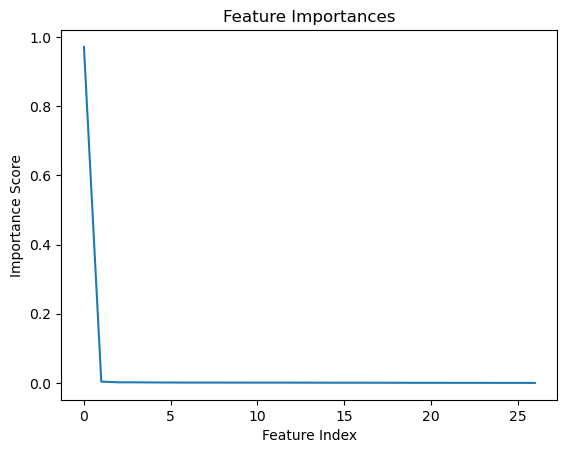

In [29]:
plt.figure()
plt.plot(feature_importances.values)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()

In [30]:
print(feature_importances)

fertility_rate                                      0.970761
infant_mortality                                    0.004042
minimum_wage                                        0.002112
urban_population                                    0.002013
life_expectancy                                     0.001605
longitude                                           0.001507
physicians_per_thousand                             0.001261
maternal_mortality_ratio                            0.001254
land_area                                           0.001239
latitude                                            0.001234
out_of_pocket_health_expenditure                    0.001180
total_tax_rate                                      0.001175
density                                             0.001134
gross_tertiary_education_enrollment_percentage      0.001057
gross_primary_education_enrollment_percentage       0.000908
population                                          0.000892
forested_area_percentage

[Return to top](#top)

<a id = "2.7"></a>
### Outliers

From the visualizations created in Milestone 1, it is clear that a number of columns contain outliers. 

For 6 of the columns, the numbers are very large and would benefit from being converted into log values to handle the outliers.

In [31]:
# A list of columns to convert to log values
columns_to_convert = ["land_area", "armed_forces_size", "co2_emissions", "gross_domestic_product", "population", "urban_population"]

log_columns_list = []

for column in columns_to_convert:
    
    # Creates a new column name indicating it is the log
    new_column_name = f"{column}_log"
    
    # Adds the new column name to the list
    log_columns_list.append(new_column_name)
    
    # Creates a new column with the log value
    # Handles any negative or zero values
    world_df_filled[new_column_name] = np.log1p(world_df_filled[column])

In [32]:
print(world_df_filled.shape)
print(world_df_filled.isna().any())
display(world_df_filled.head(5))

(195, 34)
density                                             False
agricultural_land                                   False
land_area                                           False
armed_forces_size                                   False
birth_rate                                          False
co2_emissions                                       False
consumer_price_index                                False
consumer_price_index_change_percentage              False
fertility_rate                                      False
forested_area_percentage                            False
gasoline_price                                      False
gross_domestic_product                              False
gross_primary_education_enrollment_percentage       False
gross_tertiary_education_enrollment_percentage      False
infant_mortality                                    False
life_expectancy                                     False
maternal_mortality_ratio                            False
mini

,density,agricultural_land,land_area,armed_forces_size,birth_rate,co2_emissions,consumer_price_index,consumer_price_index_change_percentage,fertility_rate,forested_area_percentage,...,unemployment_rate,urban_population,latitude,longitude,land_area_log,armed_forces_size_log,co2_emissions_log,gross_domestic_product_log,population_log,urban_population_log
0,60,58.1,652230.0,323000.000000,32.49,8672.0,149.900000,2.300000,4.47,2.1,...,11.120000,9797273.0,33.939110,67.709953,13.388154,12.685411,9.067970,23.673025,17.454195,16.097615
1,105,43.1,28748.0,9000.000000,11.78,4536.0,119.050000,1.400000,1.62,28.1,...,12.330000,1747593.0,41.153332,20.168331,10.266358,9.105091,8.420021,23.449685,14.864299,14.373751
2,18,17.4,2381741.0,317000.000000,24.28,150006.0,151.360000,2.000000,3.02,0.8,...,11.700000,31510100.0,28.033886,1.659626,14.683343,12.666660,11.918437,25.858995,17.577944,17.265819
3,164,40.0,468.0,159274.853801,7.20,469.0,190.460955,6.722346,1.27,34.0,...,6.886364,67873.0,42.506285,1.521801,6.150603,11.978393,6.152733,21.871956,11.253416,11.125408
4,26,47.5,1246700.0,117000.000000,40.73,34693.0,261.730000,17.100000,5.52,46.3,...,6.890000,21061025.0,-11.202692,17.873887,14.036011,11.669938,10.454322,25.273298,17.275772,16.862935


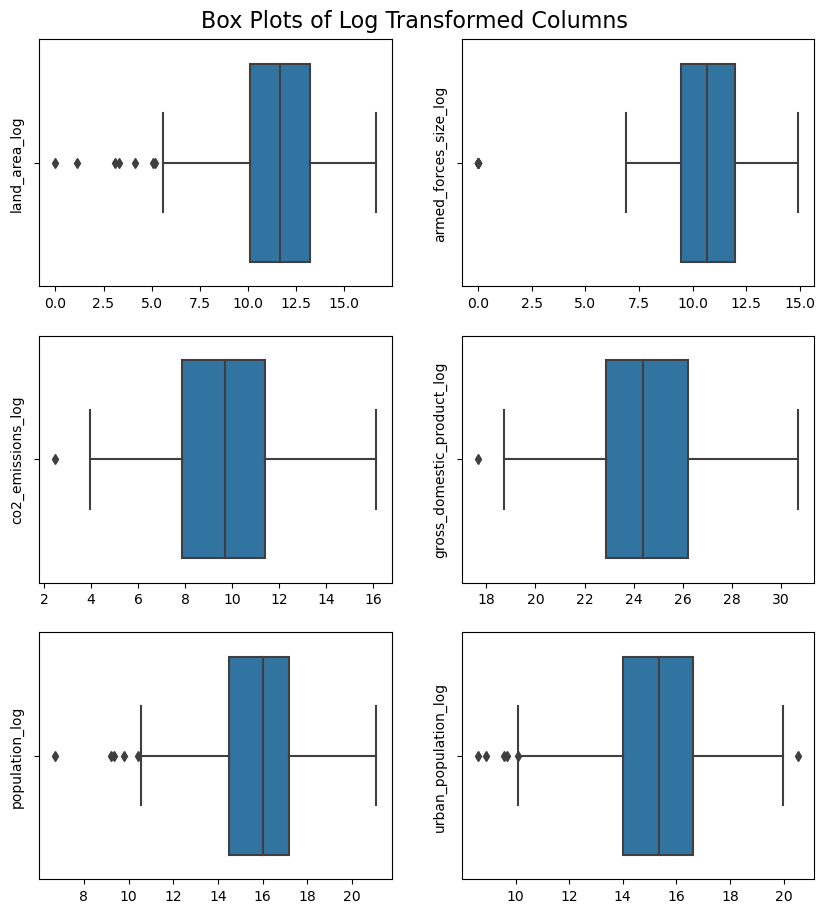

In [33]:
# Finds the length of the list
num_subplots = len(log_columns_list)

# Finds the number of rows needed to plot the list
num_rows = (num_subplots + 1) // 2

fig, axs = plt.subplots(nrows = num_rows, ncols = 2, figsize = (10, 10))


for i, column in enumerate(log_columns_list):
    row_index = i // 2
    col_index = i % 2
    
    sns.boxplot(x = world_df_filled[column], ax = axs[row_index, col_index])
    axs[row_index, col_index].set_ylabel(column)
    axs[row_index, col_index].set(xlabel = "")

fig.suptitle("Box Plots of Log Transformed Columns", fontsize=16)

plt.subplots_adjust(top=.95)

plt.show()

[Return to top](#top)

<a id = "2.8"></a>
### Target Variable Normalization

The histogram created in the visualizations section showed that the birth_rate variable is not normally distributed. 

A logarithmic transformation does not make sense in this case and there are no outliers in the data. Because of this, I will use the MinMaxScaler to get a normal distribution of the data.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Creates an instance of the scaler
scaler = MinMaxScaler()

# Fits and transforms the scaler to the training data
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

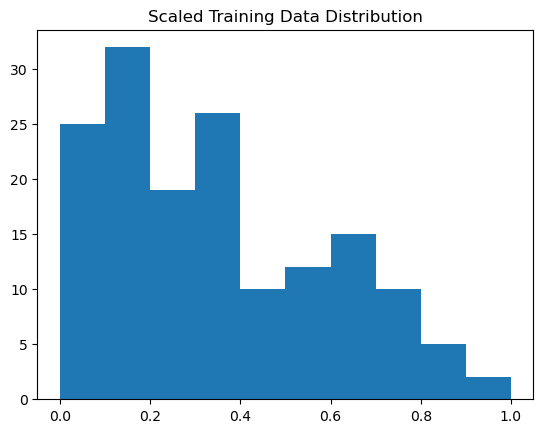

In [36]:
plt.figure()

plt.hist(y_train_scaled)
plt.title("Scaled Training Data Distribution")

plt.show()

In [37]:
# Takes the square root of the target variable
world_df_filled["birth_rate_sqrt"] = np.sqrt(world_df_filled["birth_rate"])

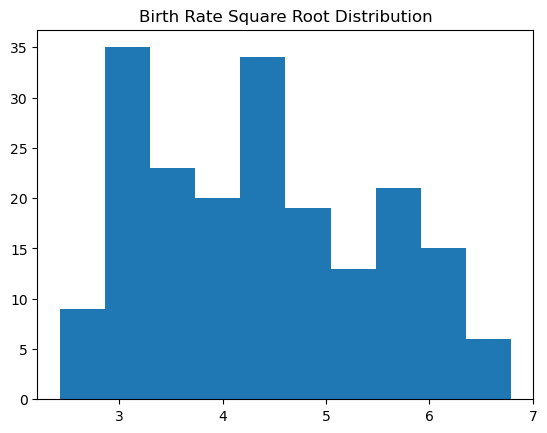

In [38]:
plt.figure()

plt.hist(world_df_filled["birth_rate_sqrt"])
plt.title("Birth Rate Square Root Distribution")

plt.show()

[Return to top](#top)

### Dropping Additional Columns<a id = "2.10"></a>

_Note: Updated after feedback week of 2.12.24_

After reviewing the results from initial data preparation, the following columns will also be dropped:

<ul>
    <li>birth_rate - taking the square root better achieves normal distribution</li>
    <li>fertility_rate - the measurement for fertility rate includes the value of the target variable</li>
    <li>land_area - the data is better represented by its log value</li>
    <li>armed_forces_size - the data is better represented by its log value</li>
    <li>co2_emissions - the data is better represented by its log value</li>
    <li>gross_domestic_product - the data is better represented by its log value</li>
    <li>population - the data is better represented by its log value</li>
    <li>urban_population - the data is better represented by its log value</li>
     </ul> 

In [39]:
# Creates a list of columns to drop
columns_to_drop = ["birth_rate", "fertility_rate", "land_area", "armed_forces_size", "co2_emissions", "gross_domestic_product", "population", "urban_population"]

# Creates a new dataframe excluding dropped columns
world_df_model = (world_df_filled.drop(columns = columns_to_drop))

In [40]:
missing_values = world_df_model.isna().any().any()

In [41]:
print("Shape Before Drops: ", world_df_filled.shape)
print("Shape After Drops: ", world_df_model.shape)
print("Number of Columns Dropped: ", len(columns_to_drop))
print("Missing Values: ", missing_values)

Shape Before Drops:  (195, 35)
Shape After Drops:  (195, 27)
Number of Columns Dropped:  8
Missing Values:  False


In [42]:
# Creates a dataframe that does not include adjusting for the square root of the target variable
world_df_not_adjusted = world_df_filled.copy()

columns_to_drop = ["birth_rate_sqrt", "fertility_rate", "land_area", "armed_forces_size", "co2_emissions", "gross_domestic_product", "population", "urban_population"]

# Creates a new dataframe excluding dropped columns
world_df_not_adjusted = (world_df_filled.drop(columns = columns_to_drop))

In [43]:
missing_values = world_df_not_adjusted.isna().any().any()

In [44]:
print("Shape Before Drops: ", world_df_filled.shape)
print("Shape After Drops: ", world_df_not_adjusted.shape)
print("Number of Columns Dropped: ", len(columns_to_drop))
print("Missing Values: ", missing_values)

Shape Before Drops:  (195, 35)
Shape After Drops:  (195, 27)
Number of Columns Dropped:  8
Missing Values:  False


[Return to top](#top)

<a id = "2.9"></a>
### Milestone 2 Summary

I found this Milestone to be particularly challenging and there are multiple improvements that could/need to be made.

Missing data could be handled on more of a case-by-case basis instead of a one-size fits all approach. Outliers that might affect the mean were not taken into account. Also, the mean approach does not make sense for the Latitude and Longitude columns. I am considering dropping those columns anyway due to the type of data they contain.  

I wanted to perform feature selection before dealing with outliers as there are multiple columns with outliers and they need to be handled individually. I thought I could narrow down the important features using Random Forest and then deal with outliers from there. The results were not useful as it only shows fertility rate as having any significant importance at all. This is in contrast to my correlation heat map which showed several other features as being highly correlated with the birth rate. I need to tweak how I am performing the feature selection.  

I was able to identify 6 columns from my original box and whisker plots that would likely benefit from logarithmic transformation to handle outliers. It helped to an extent, but several of them still contain outliers that warrant closer inspection. There are also still multiple columns with outliers that have not yet been handled and for which logarithmic transformation is not appropriate.  

Finally, I attempted to normalize the distribution of my target variable using a Min-Max Scaler. It didn't work and I need to re-evaluate the best way to achieve this.  

_Updated week of 2.19.12_

Dropped additional columns to remove fertility_rate and original columns that were log-transformed.

Dropped the original birth_rate column and will use the square root of the values instead. The square root values are closer to attaining a normal distribution. The results of the model will need to be transformed to account for this.

[Return to top](#top)

## Milestone 3 <a id = "3"></a>

### Split the Data - Linear Regression & Random Forest<a id = "3.1"></a>

The first split is done using the square root of the target variable. This was intended to help normalize its distribution. 

In [45]:
# Creates the X variable by dropping the target variable
X_model = world_df_model.drop("birth_rate_sqrt", axis = 1)

# Assigns the target variable
y_model = world_df_model["birth_rate_sqrt"]

# Splits the data into 20% test and 80% training
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y_model, test_size = .2, random_state = 42)

In [46]:
print("X_train_model shape: ", X_train_model.shape)
print("y_train_model shape: ", y_train_model.shape)
print("X_test_model shape: ", X_test_model.shape)
print("y_test_model shape: ", y_test_model.shape)

X_train_model shape:  (156, 26)
y_train_model shape:  (156,)
X_test_model shape:  (39, 26)
y_test_model shape:  (39,)


### Model Selection - Linear Regression & Random Forest<a id = "3.2"></a>

Linear Regression and Random Forest were selected due to the numerical, continuous nature of the data. The original correlation matrix suggested strong relationships between several of the features and the target variable that might be linear. Random Forest was included to account for possible non-linear relationships

Different scalers were also included to make the search for the best model more robust.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

In [48]:
# Creates a list of scalers to test
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

In [49]:
pipe = Pipeline([("scaler", None), ("classifier", LinearRegression())])

In [50]:
# Creates a search space including Linear Regression and Random Forest Regressor
search_space = [
    {
        "scaler": list(scalers.values()),
        "classifier": [LinearRegression()],
    },
    {
        "scaler": list(scalers.values()),
        "classifier": [RandomForestRegressor()],
        "classifier__n_estimators": [10, 100, 1000],
        "classifier__max_features": [1, 2, 3, 4, 5]
    }
]

In [51]:
classifier = GridSearchCV(pipe, search_space, cv = 5, verbose = 0)

In [52]:
best_model = classifier.fit(X_train_model, y_train_model)

In [53]:
print(best_model.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(max_features=5, n_estimators=1000))])


In [54]:
print(best_model.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(max_features=5, n_estimators=1000))])


### Model Evaluation - Linear Regression & Random Forest<a id = "3.3"></a>

Mean Squared Error, Root Mean Squared Error and R^2 scores were used as evaluation metrics because these are regression models.

In [55]:
# Uses the fitted model to predict the test data
best_predictions = best_model.predict(X_test_model)

In [56]:
# Reverses the square root taken on the target variable
best_predictions_original_scale = np.square(best_predictions)

In [57]:
# Calculcates the mean squared error
mse = mean_squared_error(y_test_model, best_predictions_original_scale)

In [58]:
# Calculates the root mean squared error
rmse = np.sqrt(mse)

In [59]:
# Calculates the R2 score
r2 = r2_score(y_test_model, best_predictions_original_scale)

In [60]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 307.1045299109872
Root Mean Squared Error (RMSE): 17.524398132631752
R-squared (R²) Score: -222.14446242110705


[Return to top](#top)

### Split the Data - Support Vector Regression<a id = "3.4"></a>

In [61]:
# Splits the data into a new training and test set
# Creates the X variable by dropping the target variable
X_SVR = world_df_model.drop("birth_rate_sqrt", axis = 1)

# Assigns the target variable
y_SVR = world_df_model["birth_rate_sqrt"]

# Splits the data into 20% test and 80% training
X_train_SVR, X_test_SVR, y_train_SVR, y_test_SVR = train_test_split(X_SVR, y_SVR, test_size = .2, random_state = 42)

In [62]:
print("X_train_SVR shape: ", X_train_SVR.shape)
print("y_train_SVR shape: ", y_train_SVR.shape)
print("X_test_SVR shape: ", X_test_SVR.shape)
print("y_test_SVR shape: ", y_test_SVR.shape)

X_train_SVR shape:  (156, 26)
y_train_SVR shape:  (156,)
X_test_SVR shape:  (39, 26)
y_test_SVR shape:  (39,)


### Model Selection - Support Vector Regression<a id = "3.5"></a>

After poor performance of both Linear Regression and Random Forest Regression, SVR was used to help handle potential non-linear relationships as well as the presence of outliers in the data. 

In [63]:
from sklearn.svm import SVR

In [64]:
# Creates a list of scalers to test
scalers_svr = {
    'MinMaxScaler': MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Creates a pipeline
pipe_svr = Pipeline([("scaler", None), ("classifier", SVR())])

In [65]:
# Creates a search space for SVR hyperparameters
search_space_svr = {
    "scaler": list(scalers_svr.values()),
    "classifier__kernel": ["linear", "rbf"],  
    "classifier__C": [0.1, 1, 10],            
    "classifier__epsilon": [0.1, 0.2, 0.5]     
}

In [66]:
classifier_svr = GridSearchCV(pipe_svr, search_space_svr, cv = 5, verbose = 0)

In [67]:
best_model_svr = classifier_svr.fit(X_train_SVR, y_train_SVR)

In [68]:
print(best_model_svr.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVR(C=1, epsilon=0.2))])


### Model Evaluation - Support Vector Regression<a id = "3.6"></a>

In [69]:
# Uses the fitted model to predict the test data
best_predictions_svr = best_model_svr.predict(X_test_SVR)

# Reverses the square root taken on the target variable
best_predictions_original_svr = np.square(best_predictions_svr)

In [70]:
# Calculcates the mean squared error
mse_svr = mean_squared_error(y_test_SVR, best_predictions_original_svr)

# Calculates the root mean squared error
rmse_svr = np.sqrt(mse_svr)

# Calculates the R2 score
r2_svr = r2_score(y_test_SVR, best_predictions_original_svr)

In [71]:
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R²) Score:", r2_svr)

Mean Squared Error (MSE): 339.57482392580073
Root Mean Squared Error (RMSE): 18.427556102907428
R-squared (R²) Score: -245.73762239400273


[Return to top](#top)

### Milestone 3 Summary<a id = "3.7"></a>

In [72]:
print("Random Forest Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

print("\nSVR Results:")
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R²) Score:", r2_svr)

Random Forest Results:
Mean Squared Error (MSE): 307.1045299109872
Root Mean Squared Error (RMSE): 17.524398132631752
R-squared (R²) Score: -222.14446242110705

SVR Results:
Mean Squared Error (MSE): 339.57482392580073
Root Mean Squared Error (RMSE): 18.427556102907428
R-squared (R²) Score: -245.73762239400273


The RSME values show that predicted values varied from the actual values by 17-18 units for both models. This measurement is sensitive to outliers which do exist in the data. This is relatively large average error considering the range of birth rate is from 7-47 births per 1000 population per year.

The R-squared Scores for both models show that neither is a decent model for predicting birth rate. Normally, R-squared scores range between 0-1. The negative values indicate that both models perform more poorly at predicting the target variable than simply using the mean value.

The dataset may not be sufficiently large to successfully utilize Random Foreset or SVR models. Overfitting may also be occurring. It is also possible that relationships between the variables is non-linear and the selected models are not sufficient to detect it

[Return to top](#top)

## Addendum<a id = "4.0"></a>

Due to the seemingly poor performance of the models with the birth rate target variable transformed, I will run the models again but without the square root transformation. 

_Everything in this section was added after feedback from Milestone 3._

### Linear Regression & Random Forest<a id = "4.1"></a>

In [73]:
# Creates the X variable by dropping the target variable
X_orig = world_df_not_adjusted.drop("birth_rate", axis = 1)

# Assigns the target variable
y_orig = world_df_not_adjusted["birth_rate"]

# Splits the data into 20% test and 80% training
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size = .2, random_state = 42)

In [74]:
print("X_train_orig shape: ", X_train_orig.shape)
print("y_train_orig shape: ", y_train_orig.shape)
print("X_test_orig shape: ", X_test_orig.shape)
print("y_test_orig shape: ", y_test_orig.shape)

X_train_orig shape:  (156, 26)
y_train_orig shape:  (156,)
X_test_orig shape:  (39, 26)
y_test_orig shape:  (39,)


In [75]:
# Fits the linear regression and random forest models to the data
best_model_orig = classifier.fit(X_train_orig, y_train_orig)

In [76]:
# Finds the best estimator for the model
print(best_model_orig.best_estimator_)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', RandomForestRegressor(max_features=5))])


In [77]:
best_predictions_orig = best_model_orig.predict(X_test_orig)

In [90]:
# Calculates the MSE
mse_orig_rand = mean_squared_error(y_test_orig, best_predictions_orig)

# Calculates the RSME
rsme_orig_rand = np.sqrt(mse_orig_rand)

# Calculates the R2 score
r2_orig_rand = r2_score(y_test_orig, best_predictions_orig)

In [91]:
print("Mean Squared Error (MSE) Original :", mse_orig_rand)
print("Root Mean Squared Error (RMSE) Original :", rsme_orig_rand)
print("R-squared Original: ", r2_orig_rand)

Mean Squared Error (MSE) Original : 12.279728586216669
Root Mean Squared Error (RMSE) Original : 3.5042443673660473
R-squared Original:  0.8889695803556887


[Return to top](#top)

### Support Vector Regression<a id = "4.2"></a>

In [80]:
# Splits the data into a new training and test set
# Creates the X variable by dropping the target variable
X_SVR_orig = world_df_not_adjusted.drop("birth_rate", axis = 1)

# Assigns the target variable
y_SVR_orig = world_df_not_adjusted["birth_rate"]

# Splits the data into 20% test and 80% training
X_train_SVR_orig, X_test_SVR_orig, y_train_SVR_orig, y_test_SVR_orig = train_test_split(X_SVR_orig, y_SVR_orig, test_size = .2, random_state = 42)

In [81]:
print("X_train_SVR_orig shape: ", X_train_SVR_orig.shape)
print("y_train_SVR_orig shape: ", y_train_SVR_orig.shape)
print("X_test_SVR_orig shape: ", X_test_SVR_orig.shape)
print("y_test_SVR_orig shape: ", y_test_SVR_orig.shape)

X_train_SVR_orig shape:  (156, 26)
y_train_SVR_orig shape:  (156,)
X_test_SVR_orig shape:  (39, 26)
y_test_SVR_orig shape:  (39,)


In [82]:
best_model_svr_orig = classifier_svr.fit(X_train_SVR_orig, y_train_SVR_orig)

In [83]:
print(best_model_svr_orig.best_estimator_)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVR(C=10, epsilon=0.5))])


In [86]:
# Uses the fitted model to predict the test data
best_predictions_svr_orig = best_model_svr_orig.predict(X_test_SVR_orig)

In [88]:
# Calculcates the mean squared error
mse_svr_orig = mean_squared_error(y_test_SVR_orig, best_predictions_svr_orig)

# Calculates the root mean squared error
rmse_svr_orig = np.sqrt(mse_svr_orig)

# Calculates the R2 score
r2_svr_orig = r2_score(y_test_SVR_orig, best_predictions_svr_orig)

In [89]:
print("Mean Squared Error (MSE) Original :", mse_svr_orig)
print("Root Mean Squared Error (RMSE) Original :", rmse_svr_orig)
print("R-squared Original: ", r2_svr_orig)

Mean Squared Error (MSE) Original : 21.408396662559163
Root Mean Squared Error (RMSE) Original : 4.626920861929579
R-squared Original:  0.8064303092151522


### Summary <a id = "4.3"></a>

There must have been an issue when working with the transformed data. When all models were run with the original dataset, the results were much better. Random Forest still produced the best results and would be the best model to use in this instance.

[Return to top](#top)